## 1. Load dataset
[Best Book to Read in 2021
](https://www.kaggle.com/shashwatwork/best-book-ever-data-for-2021)

In [85]:
import pandas as pd
import numpy as np

import plotly.figure_factory as ff
import plotly.offline as py 
import statistics
import plotly.express as px
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv('Best_Books_ever.csv', usecols=['title', 'series', 'author', 'rating', 'language', 'genres', 'characters', 'pages', 'publishDate', 'awards', 'numRatings', 'likedPercent', 'price'])
data.head()

title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating language  \
0                            Suzanne Collins    4.33  English   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  English   
2                                 Harper Lee    4.28  English   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  English   
4                            Stephenie Meyer    3.60  English   

                                              genres  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   

                                          characters pages publishDate  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...   374    09/14/08   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...   870    09/28/04   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...   324    05/23/06   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...   279    10/10/00   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...   501    09/06/06   

                                              awards  numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...     6376780   
1  ['Bram Stoker Award for Works for Young Reader...     2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...     4501075   
3                                                 []     2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...     4964519   

   likedPercent price  
0          96.0  5.09  
1          98.0  7.38  
2          95.0   NaN  
3          94.0   NaN  
4          78.0   2.1

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         52478 non-null  object 
 1   series        23470 non-null  object 
 2   author        52478 non-null  object 
 3   rating        52478 non-null  float64
 4   language      48672 non-null  object 
 5   genres        52478 non-null  object 
 6   characters    52478 non-null  object 
 7   pages         50131 non-null  object 
 8   publishDate   51598 non-null  object 
 9   awards        52478 non-null  object 
 10  numRatings    52478 non-null  int64  
 11  likedPercent  51856 non-null  float64
 12  price         38113 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.2+ MB


## 2. Data Cleaning
- The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [88]:
# 수치형으로 다뤄야 할 데이터인 pages, price의 datatype을 바꿔준다

# convert datatypes 
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['pages'] = pd.to_numeric(data['pages'], errors='coerce')

Text(0.5, 1.0, 'Ratio of missing values per columns')

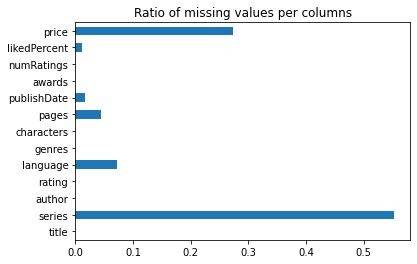

In [89]:
# 결측치 확인하기

'''Missing Value Chart'''
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [90]:
# 데이터 개수가 충분하다고 생각되어 price, pages가 없는 행은 제거하였다

data.drop(data[data['price'].isnull()].index, inplace=True)
data.drop(data[data['pages'].isnull()].index, inplace=True)
data.reset_index(drop=True, inplace=True) # reindex

In [91]:
# 효과적인 EDA를 위해 새로운 column을 도출하자

# 시리즈물인지 여부 'is_series'
data['is_series'] = 1
data['is_series'].loc[data['series'].isnull()] = 0

# 캐릭터 수 'num_characters'
data['num_characters'] = 0
for i in range(len(data)):
    if data['characters'][i] == '[]':
        continue
    else:
        data['num_characters'][i] = len(data['characters'][i].split(','))
        
# 받은 상의 개수 'num_awards'
data['num_awards'] = 0
for i in range(len(data)):
    if data['awards'][i] == '[]':
        continue
    else:
        data['num_awards'][i] = len(data['awards'][i].split(','))

In [92]:
# 장르가 1:M으로 분류되어 있으므로, main_genre를 선정하자

# 장르별 빈도 카운팅
genre_dict = {}
for i in range(len(data)):
    if data['genres'][i] == '[]':
        continue
    lst = data['genres'][i][2:-2].split("', '")
    for s in lst:
        genre_dict[s] = genre_dict.get(s, 0) + 1
        
# 상위 15개 장르만 선정, 나머지는 etc로 분류
import operator
genre_lst = sorted(genre_dict.items(), key=operator.itemgetter(1), reverse=True)[:15]

In [93]:
# 선정된 genre category
genre_lst

[('Fiction', 25513),
 ('Fantasy', 11577),
 ('Romance', 10122),
 ('Young Adult', 9101),
 ('Contemporary', 7195),
 ('Nonfiction', 6930),
 ('Historical Fiction', 6564),
 ('Mystery', 6344),
 ('Novels', 6235),
 ('Audiobook', 5897),
 ('Adult', 5877),
 ('Classics', 5668),
 ('Historical', 5478),
 ('Adventure', 5454),
 ('Literature', 4690)]

In [94]:
# 주요 장르로 재배치, 해당되는 장르가 없으면 etc
data['main_genre'] = 'etc'
for i in range(len(data)):
    for g, num in genre_lst:
        if g in data['genres'][i]:
            data['main_genre'][i] = g
            break

In [95]:
# 최종 데이터셋 확인

del data['series']
del data['genres']
del data['characters']
del data['awards']

data.head(5)

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                                   Twilight   
3                             The Book Thief   
4                                Animal Farm   

                                              author  rating language  pages  \
0                                    Suzanne Collins    4.33  English  374.0   
1          J.K. Rowling, Mary GrandPré (Illustrator)    4.50  English  870.0   
2                                    Stephenie Meyer    3.60  English  501.0   
3                    Markus Zusak (Goodreads Author)    4.37  English  552.0   
4  George Orwell, Russell Baker (Preface), C.M. W...    3.95  English  141.0   

  publishDate  numRatings  likedPercent  price  is_series  num_characters  \
0    09/14/08     6376780          96.0   5.09          1              23   
1    09/28/04     2507623          98.0   7.38          1              44   
2    09/06/06     4964519          78.0   2.10          1              17   
3    03/14/06     1834276          96.0   3.80          0               8   
4    04/28/96     2740713          91.0   4.42          0              10   

   num_awards main_genre  
0          41    Fiction  
1           9    Fiction  
2          25    Fiction  
3          20    Fiction  
4           2    Fiction

## 3. Exploratory Data Analysis

In [96]:
# 수치형 변수 기초통계분석

data.describe()

rating         pages    numRatings  likedPercent         price  \
count  37405.000000  37405.000000  3.740500e+04  37216.000000  37405.000000   
mean       3.997503    337.708702  1.966226e+04     92.300650      9.512919   
std        0.315009    232.926442  9.557268e+04      5.385928     23.846418   
min        0.000000      0.000000  0.000000e+00      0.000000      0.840000   
25%        3.810000    224.000000  6.960000e+02     90.000000      3.220000   
50%        4.010000    314.000000  3.317000e+03     93.000000      5.200000   
75%        4.190000    400.000000  1.189800e+04     96.000000      8.740000   
max        5.000000  14777.000000  6.376780e+06    100.000000    898.640000   

          is_series  num_characters    num_awards  
count  37405.000000    37405.000000  37405.000000  
mean       0.443096        1.684588      0.532335  
std        0.496758        7.557063      1.393591  
min        0.000000        0.000000      0.000000  
25%        0.000000        0.000000      0.000000  
50%        0.000000        0.000000      0.000000  
75%        1.000000        1.000000      0.000000  
max        1.000000      669.000000     41.000000

In [102]:
# 변수 간 상관관계 파악

import seaborn as sns
fig = px.imshow(data.corr(), template='plotly_dark', title='Heatmap')
fig.show()
fig.write_html('heatmap.html')

In [103]:
# 시리즈물과 단편의 평점 분포

# group data
hist_data = [data[data['is_series'] == 1]['rating'], data[data['is_series'] == 0]['rating']]
group_labels = ['is_series', 'not_series']
colors = ['#2BCDC1', '#F66095']

# create distplot
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors)
fig.update_layout(title_text='Rating Distribution', template='plotly_dark')
fig.show()
fig.write_html('distplot.html')

In [104]:
# 장르별 평점 분포 

fig = px.box(data, x="main_genre", y="rating", color='main_genre', template='plotly_dark')
fig['layout'].update(title='Rating Distributions by Genre')
fig.show()
fig.write_html('boxplot.html')

In [105]:
# likedPercent vs Pages 밀도 히트맵

fig = px.density_heatmap(data, x="pages", y="likedPercent", marginal_x="histogram", marginal_y="histogram", range_x=[0, 500], range_y=[80, 100], template='plotly_dark')
fig['layout'].update(title='Density Heatmap of LikedPercent vs Pages')
fig.show()
fig.write_html('density_heatmap.html')

In [106]:
# 장르의 비율

df2 = pd.DataFrame(data['main_genre'].value_counts()).reset_index()
df2.columns = ['main_genre', 'counts']

labels = df2['main_genre'].tolist()
values = df2['counts'].tolist()

fig = px.pie(df2, values=values, names=labels, template='plotly_dark')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(title='Genre Ratio', boxmode='group')
fig.show()
fig.write_html('pie.html')